In [20]:
import ast
from collections import defaultdict
from itertools import combinations
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.matplotlib.rcParams['figure.figsize'] = (12, 6)

In [2]:
% cd /Users/mdymshits/cna-course/challenge/
%ls

/Users/mdymshits/cna-course/challenge
1512486675.8805072_G.csv*     1512486675.8805072_vis.png*
1512486675.8805072_test.csv*  metasim.py*
1512486675.8805072_train.csv*


## Functions

In [101]:
def score(nodes, graph_weights):
    """returns list of scores per lists of outputs"""
    total_cor = []
    for out in nodes:
        val_per_output = 0
        for n1, n2 in combinations(out, r=2):
            corr = graph_weights['_'.join([str(n1), str(n2)])]
            val_per_output += corr
#             print n1, n2, corr, val_per_output
#             print total_cor
        total_cor.append(val_per_output)
    return total_cor

def read_outputs(fname):
    """read outputs from file into nested list"""
    with open(fname) as lines:
        nodes = []
        for i, line in enumerate(lines):
#             print i, line
            t =  line.split('outputs')[1][2:-4]
            nodes.append(ast.literal_eval(t))
    return nodes

In [ ]:
!head -100 1512486675.8805072_G.csv

In [3]:
G=nx.read_edgelist("1512486675.8805072_G.csv", delimiter=',', nodetype=int, data=(('weight',float),))

In [100]:
graph_weights = defaultdict(int)
for n1,n2,c in G.edges(data = True): 
    if abs(c['weight']) == 1:
        graph_weights['_'.join([str(n1), str(n2)])] = 1
        graph_weights['_'.join([str(n2), str(n1)])] = 1

In [93]:
graph_weights

defaultdict(int,
            {'0_0': 1,
             '100_100': 1,
             '100_123': 1,
             '100_133': 1,
             '100_61': 1,
             '101_101': 1,
             '102_1': 1,
             '102_10': 1,
             '102_102': 1,
             '102_11': 1,
             '102_113': 1,
             '102_134': 1,
             '102_142': 1,
             '102_147': 1,
             '102_19': 1,
             '102_39': 1,
             '102_42': 1,
             '102_5': 1,
             '102_59': 1,
             '102_6': 1,
             '102_72': 1,
             '102_8': 1,
             '102_9': 1,
             '103_103': 1,
             '103_149': 1,
             '103_37': 1,
             '104_104': 1,
             '105_1': 1,
             '105_105': 1,
             '105_72': 1,
             '106_106': 1,
             '107_107': 1,
             '107_67': 1,
             '108_108': 1,
             '109_109': 1,
             '10_1': 1,
             '10_10': 1,
             '10

In [81]:
fname_train = '1512486675.8805072_train.csv'  
fname_test = '1512486675.8805072_test.csv'

nodes_train = read_outputs(fname_train)
nodes_test = read_outputs(fname_test)


0 [{'inputs':[33, 98, 69, 49, 49, 72, 72, 139, 140, 141, 141, 145, 82, 117, 119, 151, 85], 'outputs':[65, 70, 12, 144, 146, 46, 150, 89, 27, 93, 82, 114, 110, 50, 117, 61, 63]},

1 {'inputs':[69, 134, 72, 17, 84, 22, 151, 88, 111, 28, 29, 81, 97, 39, 105, 47, 50], 'outputs':[99, 37, 7, 40, 75, 12, 48, 43, 148, 118, 23, 23, 152, 25, 25, 71, 104]},

2 {'inputs':[130, 69, 113, 113, 8, 8, 9, 75, 112, 17, 19, 19, 149, 151, 120, 123, 125], 'outputs':[0, 128, 3, 69, 80, 81, 82, 86, 25, 91, 31, 32, 97, 99, 45, 123, 124]},

3 {'inputs':[1, 6, 8, 138, 18, 83, 148, 150, 24, 31, 32, 40, 104, 10, 51, 56, 74], 'outputs':[128, 66, 3, 71, 10, 143, 17, 83, 97, 37, 42, 107, 44, 110, 116, 60, 63]},

4 {'inputs':[32, 16, 16, 67, 6, 8, 41, 107, 107, 76, 110, 48, 108, 115, 122, 60, 94], 'outputs':[0, 128, 126, 76, 141, 82, 20, 86, 91, 33, 148, 49, 114, 53, 57, 122, 62]},

5 {'inputs':[1, 134, 77, 142, 23, 23, 26, 32, 100, 40, 42, 107, 109, 46, 49, 62, 63], 'outputs':[1, 65, 65, 75, 141, 24, 148, 149, 151, 1

In [102]:
score_train = score(nodes_train, graph_weights)
score_test = score(nodes_test, graph_weights)
        

In [86]:
len(nodes_train), len(nodes_test)

(24, 48)

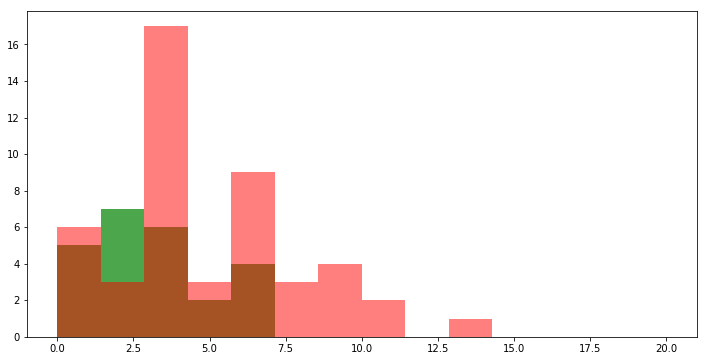

In [106]:
bins = np.linspace(0,20,15)
plt.hist(score_train, bins=bins, alpha=.7, color='g');
# plt.figure()
plt.hist(score_test, bins=bins, alpha=.5, color='r');


In [35]:
total_cor


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [29]:
graph_weights

defaultdict(int,
            {'139_139': 1.0,
             '77_77': 1.0,
             '0_7': 0,
             '2_86': 0,
             '2_81': 0,
             '0_3': 0,
             '0_0': 1.0,
             '12_27': 0,
             '129_140': 1.0,
             '12_25': 0,
             '12_24': 0,
             '12_23': 0,
             '12_22': 0,
             '129_147': 1.0,
             '129_149': 0,
             '148_62': 0,
             '59_1': 1.0,
             '132_133': 0,
             '59_6': 1.0,
             '99_104': 0,
             '59_9': 1.0,
             '97_82': 1.0,
             '148_86': 0,
             '148_84': 0,
             '91_114': 0,
             '71_107': 0,
             '71_104': 0,
             '91_118': 0,
             '118_124': 0,
             '82_110': 0,
             '55_122': 0,
             '76_15': 0,
             '76_10': 1.0,
             '76_11': 1.0,
             '55_124': 0,
             '72_139': 1.0,
             '41_55': 0,
             '3_44': 

In [43]:
mean([1,2])

NameError: name 'mean' is not defined

In [99]:
len(nodes_train[0])

17